# Part 1 - Initial EDA (Word Analysis)

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Data Engineering

In [2]:
data = pd.read_csv("data/inaugural_address.csv")
data = data.drop(data.columns[0], axis=1)
data["word count"] = data["text"].str.split().str.len()
data["character count"] = data["text"].str.len()
data["year"] = data["date"].str[:4]

# fixing Trump's label in the dataset
data.iloc[52, 0] = "Donald J. Trump"
data.iloc[54, 0] = "Donald J. Trump"

In [3]:
data.head()

,president_name,president_number,date,text,word count,character count,year
0,George Washington,1,1789-04-30 00:00:00+00:00,\nFellow-Citizens of the Senate and of the Hou...,1430,8625,1789
1,George Washington,1,1793-03-04 00:00:00+00:00,\nFellow Citizens:\nI AM again called upon by ...,135,788,1793
2,John Adams,2,1797-03-04 00:00:00+00:00,"\nWHEN it was first perceived, in early times,...",2319,13864,1797
3,Thomas Jefferson,3,1801-03-04 00:00:00+00:00,\nFriends and Fellow-Citizens:\nCALLED upon to...,1717,10117,1801
4,Thomas Jefferson,3,1805-03-04 00:00:00+00:00,"\nPROCEEDING, fellow-citizens, to that qualifi...",2157,12892,1805


Basic data preprocessing is done to get separate columns for the word count, character count, and year for the different presedential speeches over time. The name for "Donald Trump" had to also be fixed to allow for consistency when performing data analysis later on.

## Visualizations

### Word Count Patterns

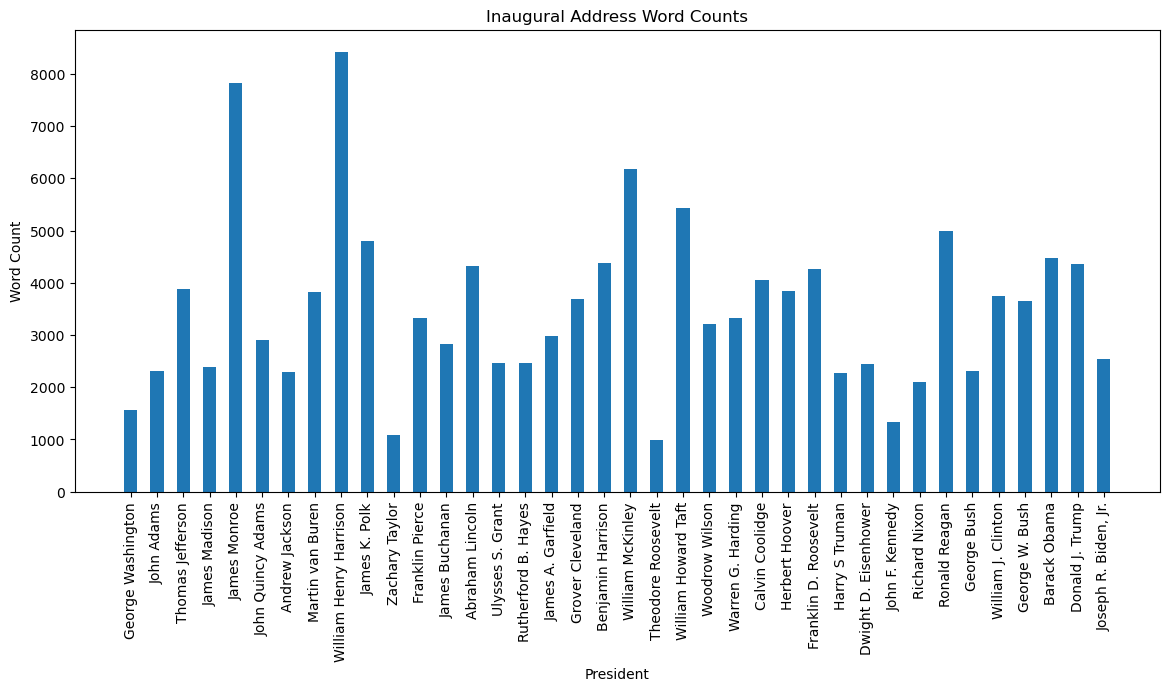

In [4]:
data_grouped = data[["president_name", "word count", "character count"]].groupby("president_name", sort=False).agg("sum").reset_index()

plt.figure(figsize=(14, 6))
plt.bar(data_grouped["president_name"], data_grouped["word count"], width=0.5)
plt.title("Inaugural Address Word Counts")
plt.xlabel("President")
plt.ylabel("Word Count")
plt.xticks(rotation=90)
plt.show()

### Character Count Patterns

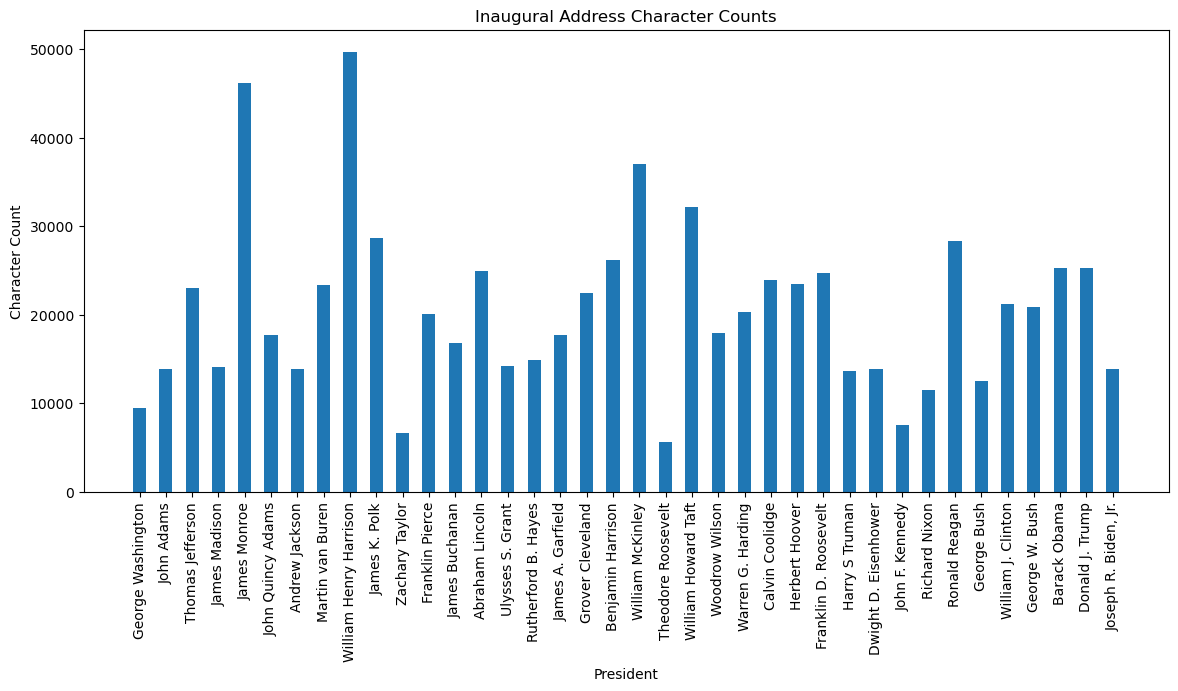

In [5]:
plt.figure(figsize=(14, 6))
plt.bar(data_grouped["president_name"], data_grouped["character count"], width=0.5)
plt.title("Inaugural Address Character Counts")
plt.xlabel("President")
plt.ylabel("Character Count")
plt.xticks(rotation=90)
plt.show()

First we group by president names so that we account for the total word count across different presidential terms. The visualization reveals spikes in word count in the early part of US history, with William Harrison being the highest. Comparatively, modern day presidents have much lower word counts. The same logic applied for the character count visualization.

### Word & Character Count differences between multi-term Presidents

In [6]:
data_counts = data["president_name"].value_counts()
indicies = data_counts[data_counts > 1].index
data_filtered = data[data["president_name"].isin(indicies)]
data_organized = data_filtered.sort_values(["president_name", "year"])
data_organized["term"] = data_organized.groupby("president_name").cumcount() + 1

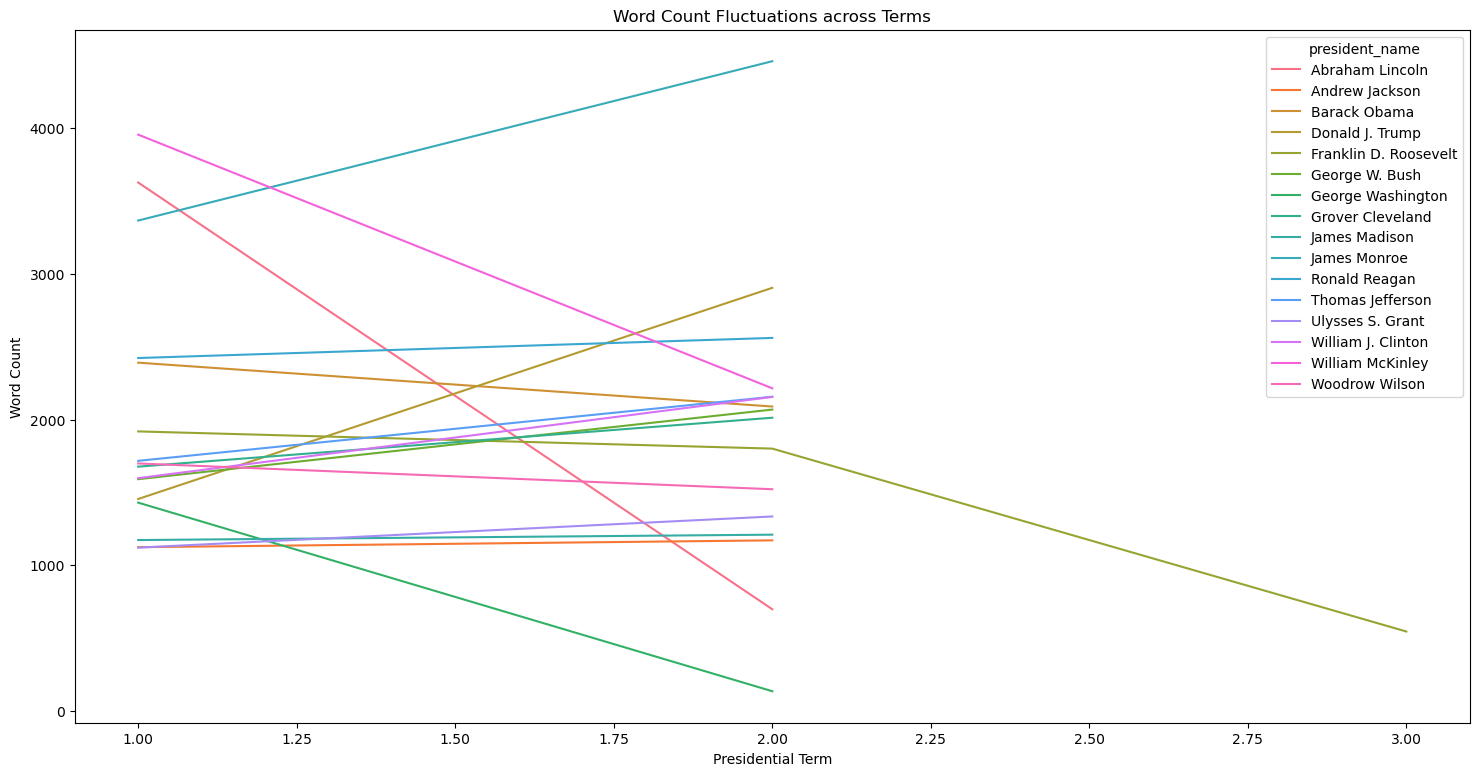

In [7]:
plt.figure(figsize=(18,9))
sns.lineplot(data=data_organized, x="term", y="word count", hue="president_name")
plt.title("Word Count Fluctuations across Terms")
plt.xlabel("Presidential Term")
plt.ylabel("Word Count")
plt.show()

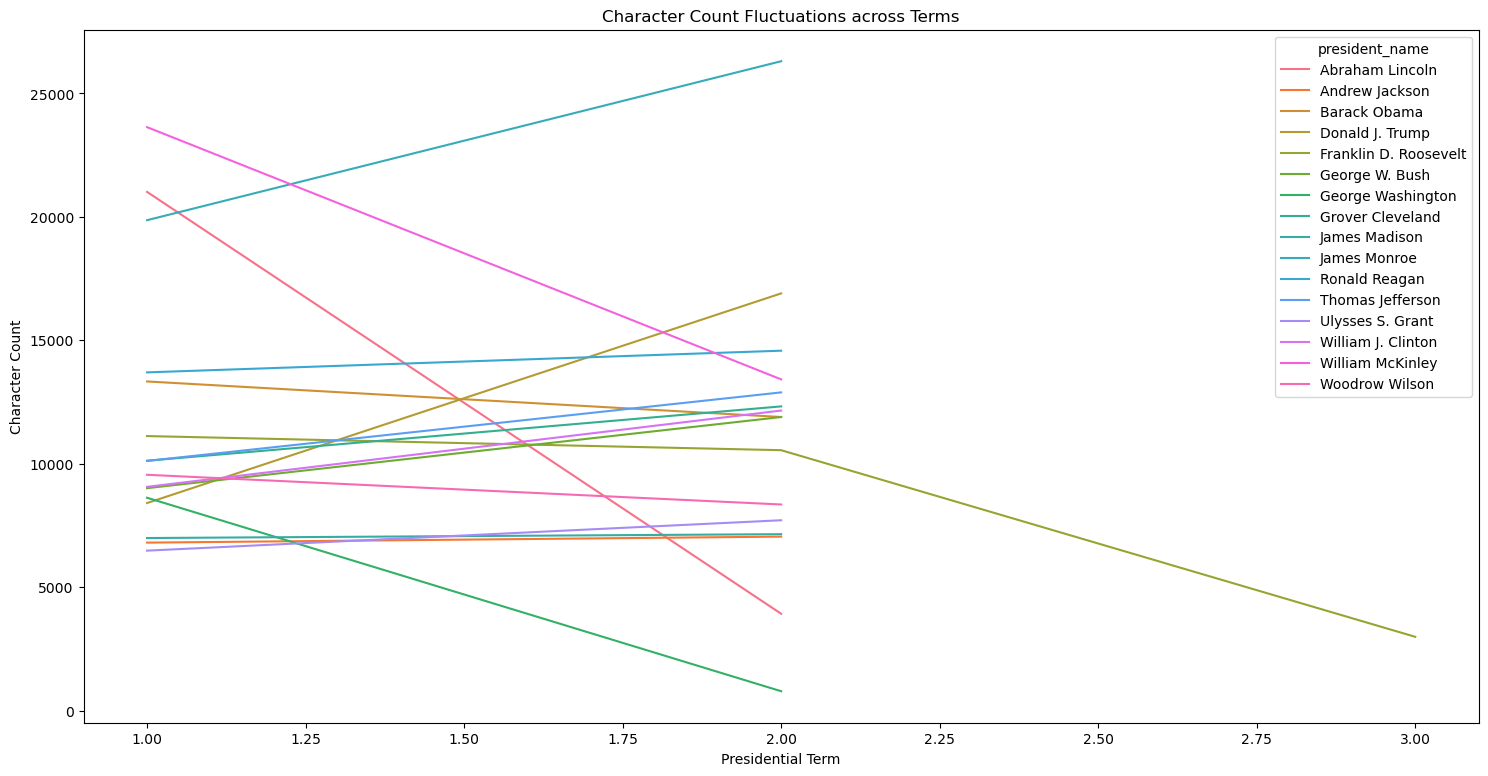

In [8]:
plt.figure(figsize=(18,9))
sns.lineplot(data=data_organized, x="term", y="character count", hue="president_name")
plt.title("Character Count Fluctuations across Terms")
plt.xlabel("Presidential Term")
plt.ylabel("Character Count")
plt.show()

An interesting observation here is that most presidents seem to have a slight increase in word and character count in their second address compared to their first address. However, with the presidents that have a decrease in word count in their second address, it appears to be more dramatic of decline, rather than a slight decline. Less controversial presidents perhaps may use less time in their second term inaugural address as their ratings are generally higher and vice vera.

### Common Words Used

In [9]:
filler_words = {"the", "and", "to", "of", "a", "in", "that", "it", "is", "was",
    "for", "on", "as", "with", "be", "by", "he", "she", "at", "from",
    "or", "an", "this", "but", "not", "are", "his", "her", "they",
    "their", "we", "you", "i", "our", "us", "them", "were", "been",
    "has", "have", "had", "will", "would", "shall", "may", "might",
    "so", "which", "who", "what", "when", "where", "why", "how",
    "can", "could", "should", "into", "than", "then", "there",
    "here", "these", "those", "its", "also", "such"}

def standardize(val):
    return [i for i in val.lower().split() if i not in filler_words]

speech_modified = data["text"].apply(standardize)
word_list = [word for speech in speech_modified for word in speech]
final_word_counts = Counter(word_list)
common_words = final_word_counts.most_common(20)

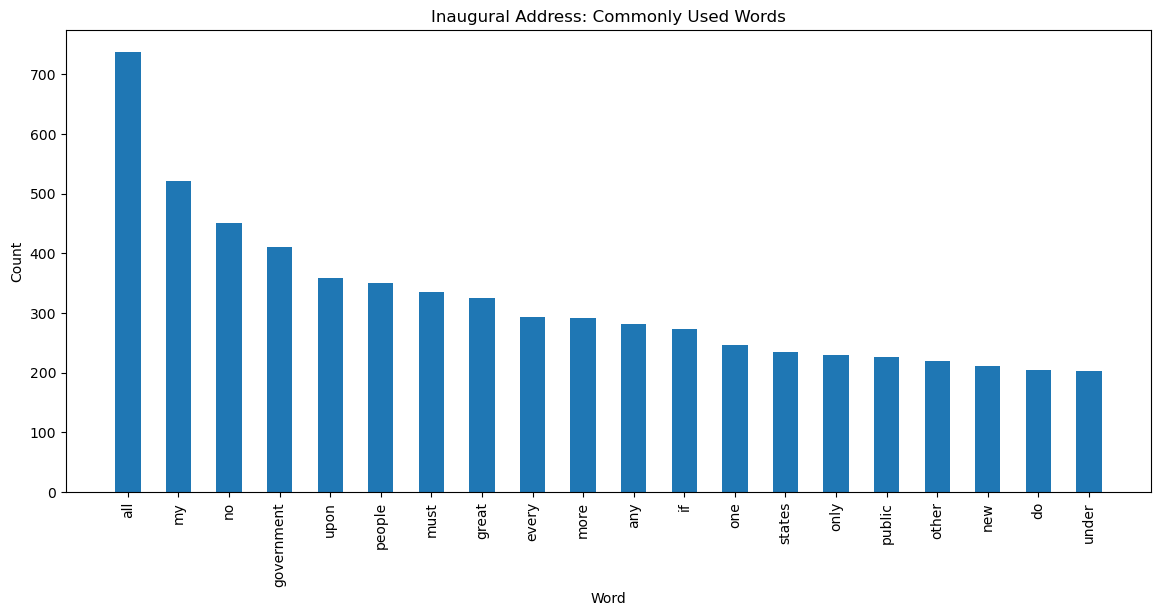

In [10]:
common_words_table = pd.DataFrame(common_words, columns=["word", "count"])

plt.figure(figsize=(14, 6))
plt.bar(common_words_table["word"], common_words_table["count"], width=0.5)
plt.title("Inaugural Address: Commonly Used Words")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

It is evident that "all", "my", "no", and "government" seem to be top choices of words across the speeches. This could be the result of aiming to signal a perosnalized and inclusive viewpoint while also being authoritative and focusing on the government as a whole. As a whole, the top 20 words signal authority, greatness, and firmness, all which is expected in an opening inaugural address when a president begins a presidential term.